In [4]:
pip install psycopg2-binary

  Obtaining dependency information for psycopg2-binary from https://files.pythonhosted.org/packages/7a/1f/a6cf0cdf944253f7c45d90fbc876cc8bed5cc9942349306245715c0d88d6/psycopg2_binary-2.9.9-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 5.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import psycopg2
import pandas.io.sql as psql
import matplotlib.pyplot as plt
import numpy as np


In [35]:
# Connect to an existing database
conn = psycopg2.connect(user="ksk4532",
                        password="test",
                        host="pg.analytics.northwestern.edu",
                        port="5432",
                        database="everything2023")


#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Executing an MYSQL function using the execute() method
cursor.execute("SELECT version();")

# Fetch a single row using fetchone() method.
data = cursor.fetchone()
print("Connection established to: ",data)

Connection established to:  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',)


In [36]:
psql.read_sql("SELECT * FROM group_6.\"SKSTINFO\" ORDER BY \"SKU\" LIMIT 100", conn)

/var/folders/s0/98nvy2x533n26bctzm80j1c00000gn/T/ipykernel_3535/2398370217.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  psql.read_sql("SELECT * FROM group_6.\"SKSTINFO\" ORDER BY \"SKU\" LIMIT 100", conn)


,SKU,STORE,COST,RETAIL
0,1000002,7007,49.00,98.0
1,1000002,7507,49.00,98.0
2,1000005,102,15.30,36.0
3,1000005,1509,15.30,36.0
4,1000005,1709,15.30,36.0
...,...,...,...,...
95,1000057,7003,37.12,50.0
96,1000057,703,37.12,50.0
97,1000057,7107,41.65,50.0
98,1000057,7403,37.12,50.0


In [37]:
cursor.close()
conn.close()

In [4]:
n = 1000
sample = pd.read_csv("trnsact.csv", header=None, skiprows=lambda i: i % n != 0)
sample

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3,202,290,1100,326708721,2005-01-18,P,1,0.0,30.00,30.00,3500000,818,0
1,387,802,600,7900,526108628,2004-12-19,P,1,79.0,54.00,54.00,125100013,696,0
2,450,2307,950,2500,0,2005-07-17,P,1,6.0,3.99,3.99,903100004,844,0
3,497,8607,190,3600,374208521,2005-02-17,P,1,24.0,6.00,6.00,632500006,881,0
4,697,6402,740,1200,0,2005-07-21,P,1,34.0,34.00,34.00,395300008,190,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120912,9999950,6604,520,9200,486901397,2005-07-29,P,1,14.0,14.00,14.00,233600184,281,0
120913,9999950,7303,810,1000,0,2005-06-11,P,1,13.5,13.50,13.50,892600116,281,0
120914,9999950,7907,900,2600,583100909,2005-04-12,P,1,13.5,13.50,13.50,254500060,281,0
120915,9999950,8404,950,1400,0,2004-08-25,P,1,13.5,13.50,13.50,925600151,281,0


In [5]:
sum(sample[9] != sample[10])

0

So column 9 and 10 are exactly the same, so we could drop one of them

In [6]:
sample.drop([10, 13], axis = 1, inplace = True)
sample

,0,1,2,3,4,5,6,7,8,9,11,12
0,3,202,290,1100,326708721,2005-01-18,P,1,0.0,30.00,3500000,818
1,387,802,600,7900,526108628,2004-12-19,P,1,79.0,54.00,125100013,696
2,450,2307,950,2500,0,2005-07-17,P,1,6.0,3.99,903100004,844
3,497,8607,190,3600,374208521,2005-02-17,P,1,24.0,6.00,632500006,881
4,697,6402,740,1200,0,2005-07-21,P,1,34.0,34.00,395300008,190
...,...,...,...,...,...,...,...,...,...,...,...,...
120912,9999950,6604,520,9200,486901397,2005-07-29,P,1,14.0,14.00,233600184,281
120913,9999950,7303,810,1000,0,2005-06-11,P,1,13.5,13.50,892600116,281
120914,9999950,7907,900,2600,583100909,2005-04-12,P,1,13.5,13.50,254500060,281
120915,9999950,8404,950,1400,0,2004-08-25,P,1,13.5,13.50,925600151,281


In [7]:
sample.columns = ["SKU", "STORE", "REGISTER", "TRANNUM", "INTERID", "SALEDATE", "STYPE", "QUANTITY", "ORIGPRICE", "AMT", "SEQ", "MIC"]
sample

,SKU,STORE,REGISTER,TRANNUM,INTERID,SALEDATE,STYPE,QUANTITY,ORIGPRICE,AMT,SEQ,MIC
0,3,202,290,1100,326708721,2005-01-18,P,1,0.0,30.00,3500000,818
1,387,802,600,7900,526108628,2004-12-19,P,1,79.0,54.00,125100013,696
2,450,2307,950,2500,0,2005-07-17,P,1,6.0,3.99,903100004,844
3,497,8607,190,3600,374208521,2005-02-17,P,1,24.0,6.00,632500006,881
4,697,6402,740,1200,0,2005-07-21,P,1,34.0,34.00,395300008,190
...,...,...,...,...,...,...,...,...,...,...,...,...
120912,9999950,6604,520,9200,486901397,2005-07-29,P,1,14.0,14.00,233600184,281
120913,9999950,7303,810,1000,0,2005-06-11,P,1,13.5,13.50,892600116,281
120914,9999950,7907,900,2600,583100909,2005-04-12,P,1,13.5,13.50,254500060,281
120915,9999950,8404,950,1400,0,2004-08-25,P,1,13.5,13.50,925600151,281


In [8]:
sample.dtypes

SKU            int64
STORE          int64
REGISTER       int64
TRANNUM        int64
INTERID        int64
SALEDATE      object
STYPE         object
QUANTITY       int64
ORIGPRICE    float64
AMT          float64
SEQ            int64
MIC            int64
dtype: object

### SKU

In [35]:
sample_sku = sample["SKU"].value_counts().reset_index()
sample_sku["index"] = sample_sku["index"].astype(str)
sample_sku

,index,SKU
0,4628597,535
1,4108011,312
2,3524026,271
3,5528349,240
4,3978011,208
...,...,...
86842,3516087,1
86843,3514878,1
86844,3514781,1
86845,3514491,1


In [50]:
sample_sku["SKU"].describe()

count    86847.000000
mean         1.392299
std          3.767847
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        535.000000
Name: SKU, dtype: float64

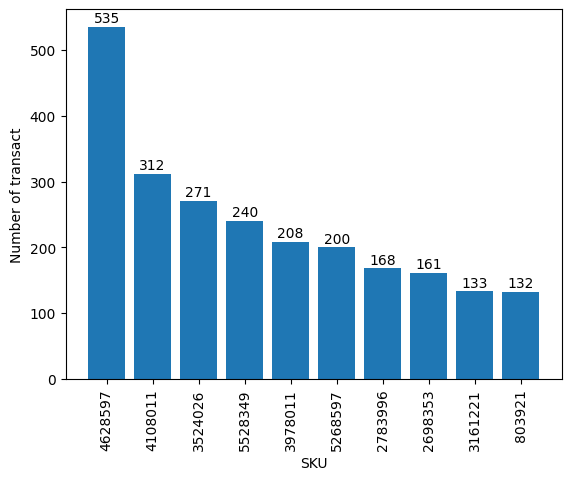

In [37]:
bars = plt.bar(sample_sku.head(10)["index"], sample_sku.head(10)["SKU"])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel("SKU")
plt.ylabel("Number of transact")
plt.show();

### Store

In [43]:
sample_store = sample["STORE"].value_counts().reset_index()
sample_store["index"] = sample_store["index"].astype(str)
sample_store

,index,STORE
0,8402,949
1,2707,915
2,504,883
3,9103,851
4,1607,838
...,...,...
324,1804,107
325,1704,100
326,6209,91
327,7604,28


In [47]:
sample_store["STORE"].describe()

count    329.000000
mean     367.528875
std      156.408061
min       16.000000
25%      254.000000
50%      333.000000
75%      468.000000
max      949.000000
Name: STORE, dtype: float64

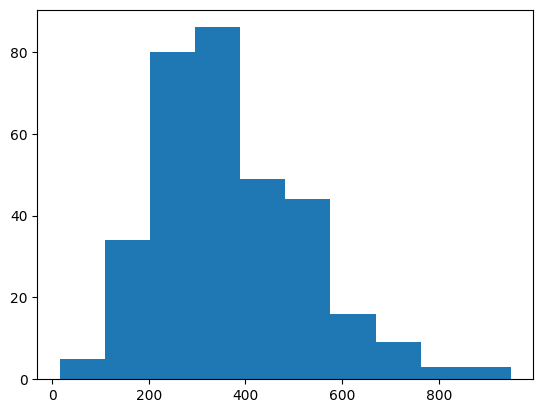

In [49]:
plt.hist(sample_store["STORE"]);

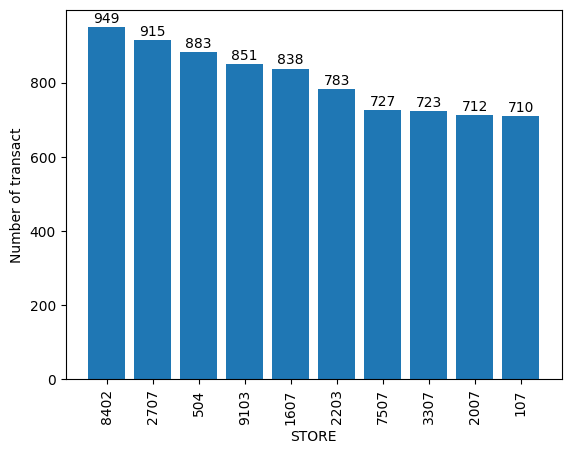

In [45]:
bars = plt.bar(sample_store.head(10)["index"], sample_store.head(10)["STORE"])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel("STORE")
plt.ylabel("Number of transact")
plt.show();

### Stype

In [12]:
sample["STYPE"].value_counts()

P    111598
R      9319
Name: STYPE, dtype: int64

R represents return, P represents purchase

In [76]:
sample[sample["STYPE"] == "R"]

,SKU,STORE,REGISTER,TRANNUM,INTERID,SALEDATE,STYPE,QUANTITY,ORIGPRICE,AMT,SEQ,MIC,DISCOUNT
19,3870,6803,511,3300,0,2004-08-28,R,1,49.0,49.00,815900172,20,1.000000
27,4564,7507,200,2700,0,2005-05-08,R,1,0.0,17.37,100100012,1,inf
34,6303,2309,320,2300,0,2004-11-19,R,1,28.0,28.00,207700049,310,1.000000
48,7302,8409,620,500,0,2004-12-27,R,1,26.0,26.00,466300149,393,1.000000
55,7425,7107,350,3700,0,2005-03-28,R,1,65.0,65.00,478100033,205,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120875,9998282,404,40,4900,0,2004-12-29,R,1,50.0,19.99,193600117,20,0.399800
120879,9998472,3403,320,700,948709897,2005-05-22,R,1,42.0,29.99,964300041,511,0.714048
120883,9999102,4607,720,7400,0,2005-06-18,R,1,18.0,18.00,275600120,753,1.000000
120901,9999950,302,710,2000,0,2004-08-01,R,1,13.5,13.50,23200078,281,1.000000


### Quantity

In [13]:
sample["QUANTITY"].value_counts()

1    120917
Name: QUANTITY, dtype: int64

### Price

In [14]:
sample[sample["ORIGPRICE"] == 0]

,SKU,STORE,REGISTER,TRANNUM,INTERID,SALEDATE,STYPE,QUANTITY,ORIGPRICE,AMT,SEQ,MIC
0,3,202,290,1100,326708721,2005-01-18,P,1,0.0,30.00,3500000,818
27,4564,7507,200,2700,0,2005-05-08,R,1,0.0,17.37,100100012,1
1344,107511,309,230,1500,0,2004-12-19,R,1,0.0,72.00,141400141,204
1737,140674,704,410,300,0,2005-07-25,P,1,0.0,9.00,978800006,823
1856,150925,9806,193,48500,72708937,2004-08-26,P,1,0.0,51.75,60800013,532
...,...,...,...,...,...,...,...,...,...,...,...,...
119238,9852339,3103,370,4600,0,2005-02-25,R,1,0.0,35.00,851400029,333
119880,9910023,1002,210,7400,549008339,2004-12-29,P,1,0.0,10.00,37700000,844
119885,9911394,403,370,2700,654000304,2004-09-30,P,1,0.0,7.37,494300037,862
120485,9963957,7703,580,1300,0,2004-11-07,R,1,0.0,17.25,805800018,658


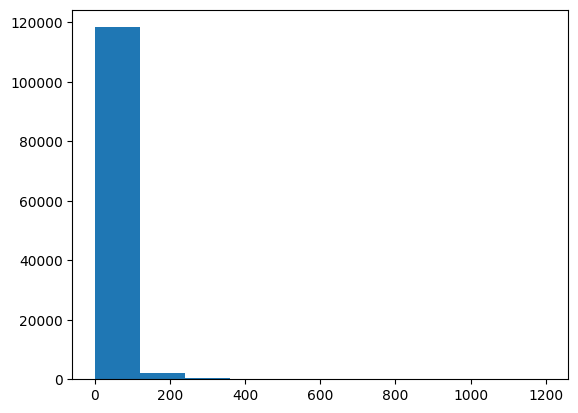

In [15]:
plt.hist(sample["ORIGPRICE"]);

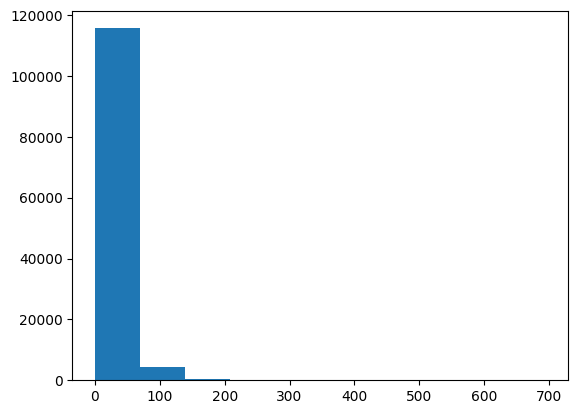

In [16]:
plt.hist(sample["AMT"]);

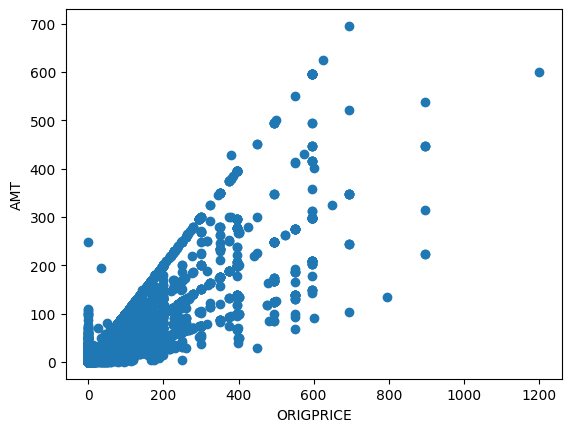

In [17]:
plt.scatter(sample["ORIGPRICE"], sample["AMT"])
plt.xlabel("ORIGPRICE")
plt.ylabel("AMT");

In [18]:
np.corrcoef(sample["ORIGPRICE"], sample["AMT"])

array([[1.        , 0.80320634],
       [0.80320634, 1.        ]])

In [19]:
len(sample)

120917

In [20]:
sum(sample["ORIGPRICE"] < sample["AMT"])

265

In [21]:
sum(sample["ORIGPRICE"] == sample["AMT"])

57196

In [22]:
sum(sample["ORIGPRICE"] > sample["AMT"])

63456

In [23]:
sample["DISCOUNT"] = sample["AMT"] / sample["ORIGPRICE"]
sample

,SKU,STORE,REGISTER,TRANNUM,INTERID,SALEDATE,STYPE,QUANTITY,ORIGPRICE,AMT,SEQ,MIC,DISCOUNT
0,3,202,290,1100,326708721,2005-01-18,P,1,0.0,30.00,3500000,818,inf
1,387,802,600,7900,526108628,2004-12-19,P,1,79.0,54.00,125100013,696,0.683544
2,450,2307,950,2500,0,2005-07-17,P,1,6.0,3.99,903100004,844,0.665000
3,497,8607,190,3600,374208521,2005-02-17,P,1,24.0,6.00,632500006,881,0.250000
4,697,6402,740,1200,0,2005-07-21,P,1,34.0,34.00,395300008,190,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120912,9999950,6604,520,9200,486901397,2005-07-29,P,1,14.0,14.00,233600184,281,1.000000
120913,9999950,7303,810,1000,0,2005-06-11,P,1,13.5,13.50,892600116,281,1.000000
120914,9999950,7907,900,2600,583100909,2005-04-12,P,1,13.5,13.50,254500060,281,1.000000
120915,9999950,8404,950,1400,0,2004-08-25,P,1,13.5,13.50,925600151,281,1.000000


In [25]:
sample[sample["DISCOUNT"] > 1]

,SKU,STORE,REGISTER,TRANNUM,INTERID,SALEDATE,STYPE,QUANTITY,ORIGPRICE,AMT,SEQ,MIC,DISCOUNT
0,3,202,290,1100,326708721,2005-01-18,P,1,0.0,30.00,3500000,818,inf
27,4564,7507,200,2700,0,2005-05-08,R,1,0.0,17.37,100100012,1,inf
966,72000,6104,360,900,0,2004-12-15,P,1,35.0,195.00,56900027,337,5.571429
1344,107511,309,230,1500,0,2004-12-19,R,1,0.0,72.00,141400141,204,inf
1737,140674,704,410,300,0,2005-07-25,P,1,0.0,9.00,978800006,823,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119238,9852339,3103,370,4600,0,2005-02-25,R,1,0.0,35.00,851400029,333,inf
119880,9910023,1002,210,7400,549008339,2004-12-29,P,1,0.0,10.00,37700000,844,inf
119885,9911394,403,370,2700,654000304,2004-09-30,P,1,0.0,7.37,494300037,862,inf
120485,9963957,7703,580,1300,0,2004-11-07,R,1,0.0,17.25,805800018,658,inf


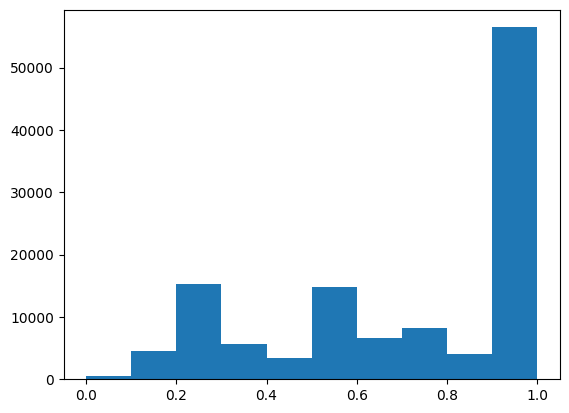

In [57]:
plt.hist(sample[sample["DISCOUNT"] <= 1]["DISCOUNT"]);

In [68]:
sample["SALEDATE"] = pd.to_datetime(sample["SALEDATE"])
sample["SALEDATE"]

0        2005-01-18
1        2004-12-19
2        2005-07-17
3        2005-02-17
4        2005-07-21
            ...    
120912   2005-07-29
120913   2005-06-11
120914   2005-04-12
120915   2004-08-25
120916   2005-02-21
Name: SALEDATE, Length: 120917, dtype: datetime64[ns]

In [77]:
sample_purchase = sample[sample["STYPE"] == "P"].groupby(["SALEDATE"])["AMT"].sum().reset_index()
sample_purchase

,SALEDATE,AMT
0,2004-08-01,4957.92
1,2004-08-02,4040.82
2,2004-08-03,4059.58
3,2004-08-04,4717.15
4,2004-08-05,5283.94
...,...,...
384,2005-08-23,5732.77
385,2005-08-24,7992.32
386,2005-08-25,6799.18
387,2005-08-26,7916.98


In [79]:
sample_return = sample[sample["STYPE"] == "R"].groupby(["SALEDATE"])["AMT"].sum().reset_index()
sample_return

,SALEDATE,AMT
0,2004-08-01,400.63
1,2004-08-02,488.26
2,2004-08-03,424.87
3,2004-08-04,446.70
4,2004-08-05,478.45
...,...,...
384,2005-08-23,542.41
385,2005-08-24,966.08
386,2005-08-25,1051.45
387,2005-08-26,1201.49


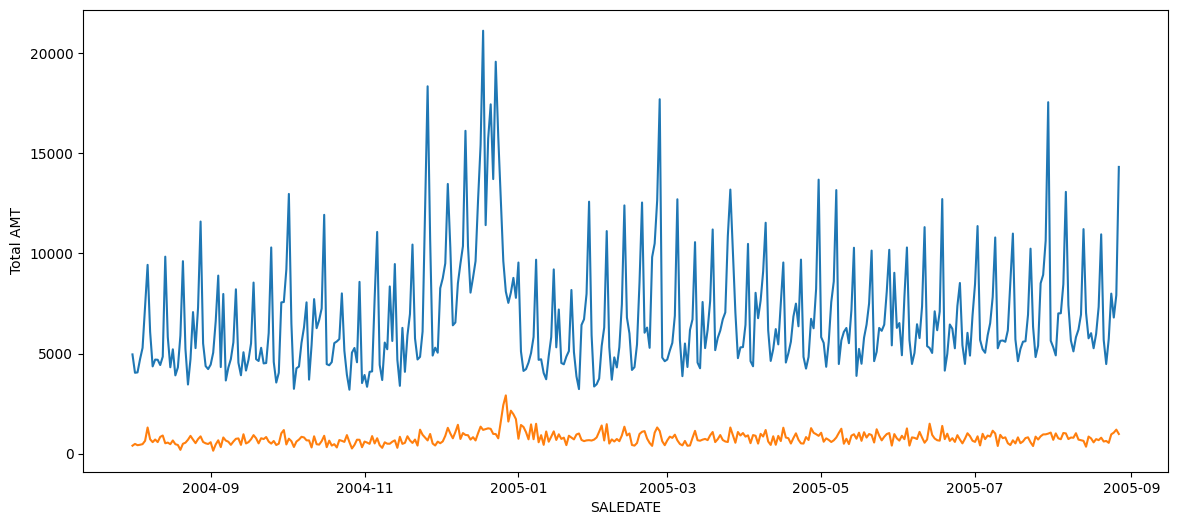

In [80]:
plt.figure(figsize=(14, 6))
plt.plot(sample_purchase["SALEDATE"], sample_purchase["AMT"])
plt.plot(sample_return["SALEDATE"], sample_return["AMT"])
plt.xlabel("SALEDATE")
plt.ylabel("Total AMT");